# Property Name prediction

In [3]:
import pandas as pd 
import numpy as np 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('hotel_dataset.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   booking_id           134590 non-null  object 
 1   property_id          134590 non-null  int64  
 2   booking_date         134590 non-null  object 
 3   check_in_date        134590 non-null  object 
 4   checkout_date        134590 non-null  object 
 5   no_guests            134590 non-null  int64  
 6   room_category        134590 non-null  object 
 7   booking_platform     134590 non-null  object 
 8   ratings_given        134590 non-null  float64
 9   booking_status       134590 non-null  object 
 10  revenue_generated    134590 non-null  int64  
 11  revenue_realized     134590 non-null  int64  
 12  property_name        134590 non-null  object 
 13  property_category    134590 non-null  object 
 14  city                 134590 non-null  object 
 15  room_class       

In [7]:
df.drop(columns=["booking_id", "property_id", "revenue_generated"], inplace=True)

### features and traget column from dataset

In [8]:
features = ["room_category", "property_category", "city", "room_class", "day_type", "no_guests", "ratings_given", "successful_bookings" , "capacity", "revenue_realized"]
target= "property_name"

### preprocessing of categorical columns

In [9]:
from sklearn.preprocessing import LabelEncoder

categorical_col = ["room_category", "property_category", "city", "room_class", "day_type"]

encoders = {}
for col in categorical_col:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

# Encode target variable
target_encoder = LabelEncoder()
df[target] = target_encoder.fit_transform(df[target])

In [10]:
X = df[features]
y = df[target]

### spliting data to trainning and testing

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

### Support Vector Classifier

In [10]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', random_state=21)
svc_model.fit(X_train, y_train)

SVC(random_state=21)

In [11]:
y_pred = svc_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score {score}')

Accuracy Score 0.19693892713854078


### Navie Bayes [GaussianNB] 

In [12]:
from sklearn.naive_bayes import GaussianNB
gb_model = GaussianNB()
gb_model.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred2 = gb_model.predict(X_test)

from sklearn.metrics import accuracy_score
score2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy Score {score2}')

Accuracy Score 0.44063598989548763


### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=21)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=21)

In [16]:
y_pred3 = lr_model.predict(X_test)

score3 = accuracy_score(y_test, y_pred3)
print(f'Accuracy Score {score3}')

Accuracy Score 0.19624548021199664


### Feature Importance graph for extracting features from datset to make prediction on target column

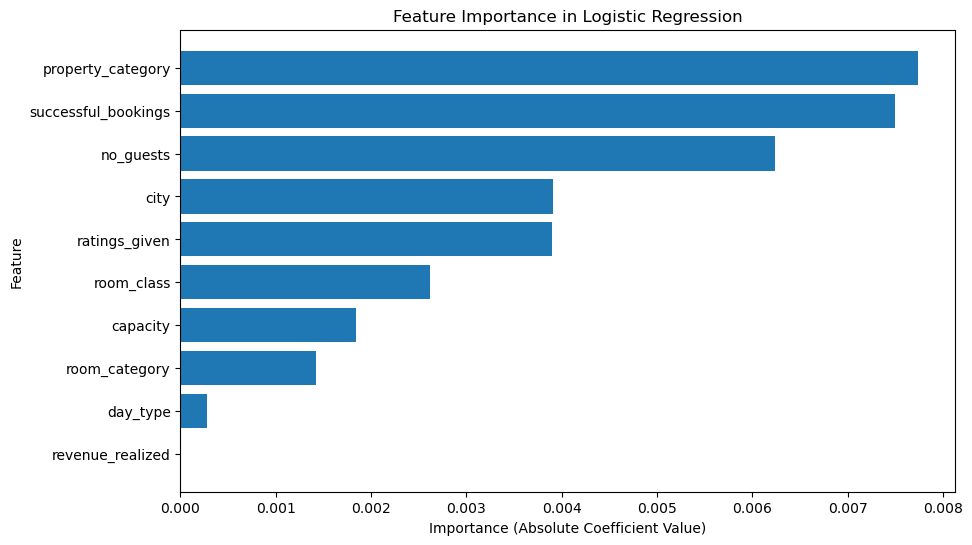

In [17]:
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(lr_model.coef_[0])  # Take absolute values for ranking
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


### AdaBoost Classifier

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=50, random_state=21)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   random_state=21)

In [19]:
y_pred4 = ada_model.predict(X_test)

score4 = accuracy_score(y_test, y_pred4)
print(f'Accuracy Score {score4}')

Accuracy Score 0.7198969735994849


### Feature Importance graph for extracting features from datset to make prediction on target column


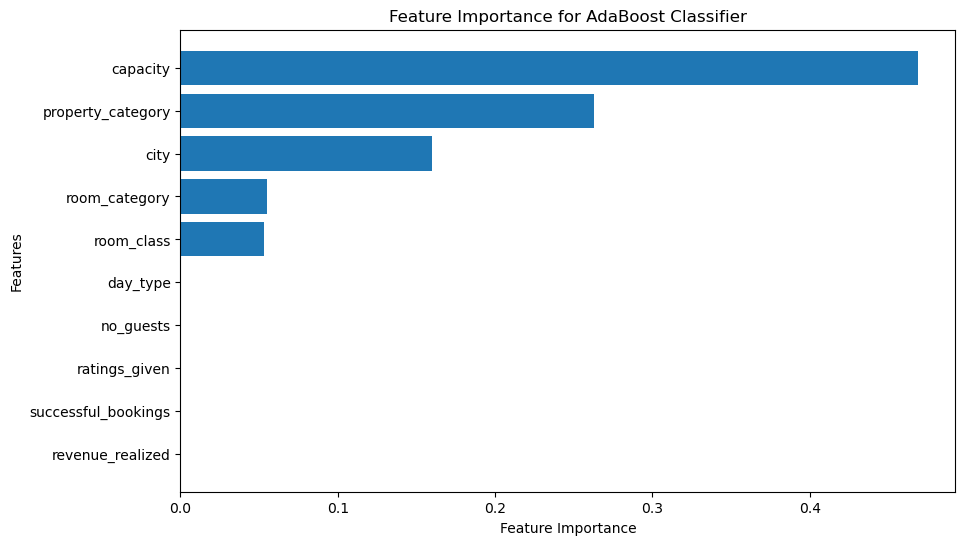

In [19]:
import matplotlib.pyplot as plt

feature_importances = ada_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for AdaBoost Classifier')
plt.gca().invert_yaxis()
plt.show()

### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfcl_model = RandomForestClassifier(random_state=21)
rfcl_model.fit(X_train, y_train)

RandomForestClassifier(random_state=21)

In [21]:
y_pred5 = rfcl_model.predict(X_test)

score5 = accuracy_score(y_test, y_pred5)
print(f'Accuracy Score {score5}')

Accuracy Score 0.9840507206894844


### Feature Importance graph for extracting features from datset to make prediction on target column

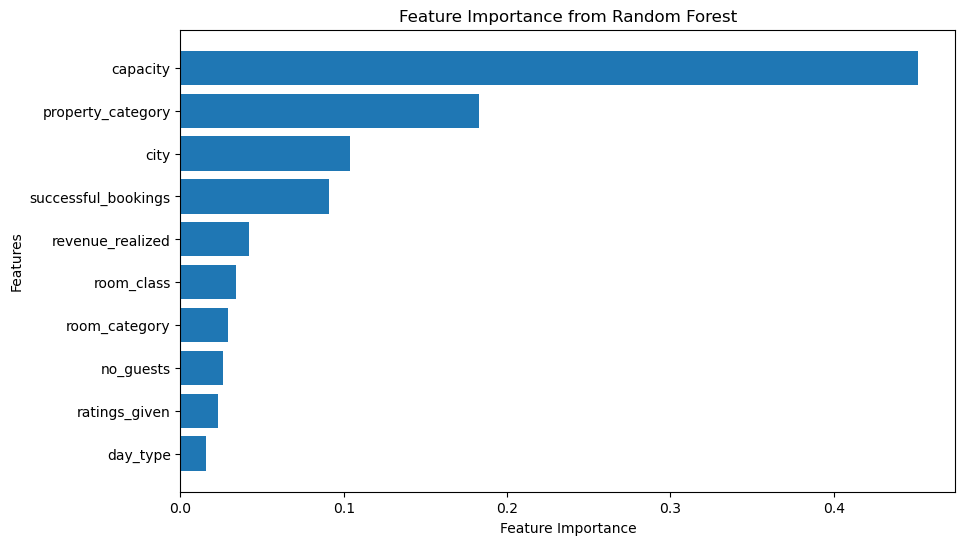

In [22]:
import matplotlib.pyplot as plt

feature_importances = rfcl_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance')

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

### KNN (K Nearest Neighbour Classifier)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
knc_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
y_pred6 = knc_model.predict(X_test)

score6 = accuracy_score(y_test, y_pred6)
print(f'Accuracy Score {score6}')

Accuracy Score 0.9701817821586012


### Feature Importance graph for extracting features from datset to make prediction on target column


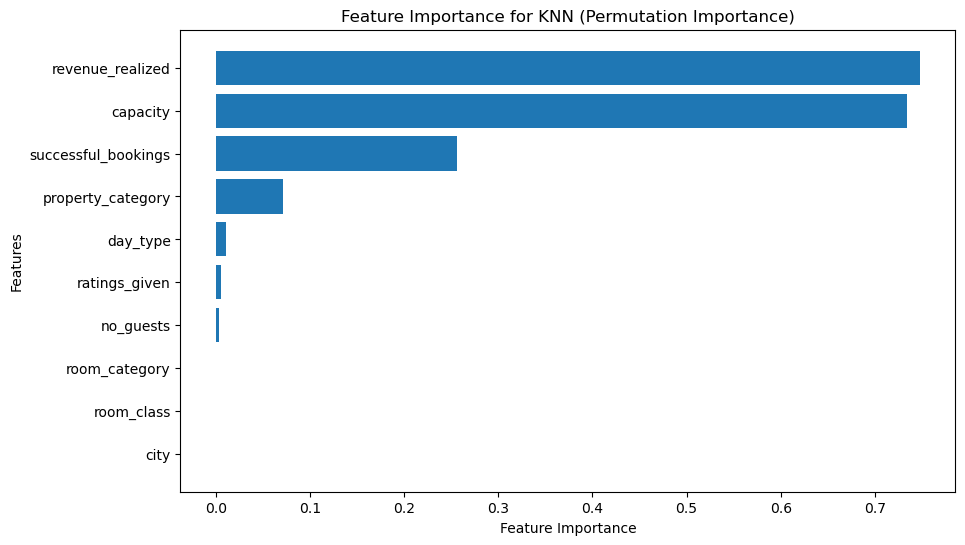

In [25]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Compute permutation importance
perm_importance = permutation_importance(knc_model, X_test, y_test, scoring="accuracy")

# Create importance dataframe
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for KNN (Permutation Importance)')
plt.gca().invert_yaxis()
plt.show()


### function to predict Property Name based on featrues

In [24]:
def encode_with_fallback(encoder, value):
    """Encodes a categorical value. If unseen, assigns -1."""
    if value in encoder.classes_:
        return encoder.transform([value])[0]
    else:
        return -1


def predict_property_name(model, user_input):
  input_df = pd.DataFrame([user_input])
  categorical_cols = ["room_category", "property_category", "city", "room_class", "day_type"]

  for col in categorical_cols:
    input_df[col] = input_df[col].apply(lambda x: encode_with_fallback(encoders[col], x))
    
  propertyname_prediction = model.predict(input_df)
  decoded_prediction = target_encoder.inverse_transform(propertyname_prediction)[0]
  return f"Predicted Property Name: {decoded_prediction}"

In [28]:
user_input = {
  "room_category" : "RT2",
  "property_category" : "Luxury",
  "city" : "Delhi", 
  "room_class" : "Elite", 
  "day_type" : "weekend",
  "no_guests" : 2, 
  "ratings_given" : 4.0, 
  "successful_bookings" : 20	, 
  "capacity" : 22,
  "revenue_realized" : 12600
}

In [34]:
print(predict_property_name(rfcl_model, user_input))

Predicted Property Name: Atliq Grands
